In [4]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import dotenv

In [ ]:
usuario = os.getenv("USUARIO")
password = os.getenv("PASSWORD")
puerto = int(os.getenv("PUERTO"))
servidor = os.getenv("SERVIDOR")
base_de_datos = os.getenv("BASE_DE_DATOS")

engine = create_engine(f"mysql+pymysql://{usuario}:{password}@{servidor}:{puerto}/{base_de_datos}",
    connect_args={"ssl":{}}
)
# pr

In [6]:
query_paro = """
SELECT 
    `Año`, 
    `Paro absoluto`, 
    `Poblacion`, 
    `Paro normalizado`
FROM PARO;
"""
paro_df = pd.read_sql(query_paro, con=engine)



In [3]:
print("Valores faltantes:")
print(paro_df.isnull().sum())

Valores faltantes:
Año                 0
Paro absoluto       0
Poblacion           0
Paro normalizado    0
dtype: int64


In [4]:
pd.set_option('display.float_format', '{:,.0f}'.format)
desc_paro_df = paro_df.describe()
desc_paro_df

,Año,Paro absoluto,Poblacion,Paro normalizado
count,156,156,156,156
mean,"2,019","1,051","912,653",563
std,4,"2,178","1,186,999","2,522"
min,"2,014",16,"83,179",11
25%,"2,014",109,"324,832",26
50%,"2,019",378,"617,122",48
75%,"2,024",906,"1,025,346",93
max,"2,024","13,067","7,009,268","15,569"


C:\Users\Jon\AppData\Local\Temp\ipykernel_10392\224199010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=paro_df, x='Año', y='Paro absoluto', palette='Set2')


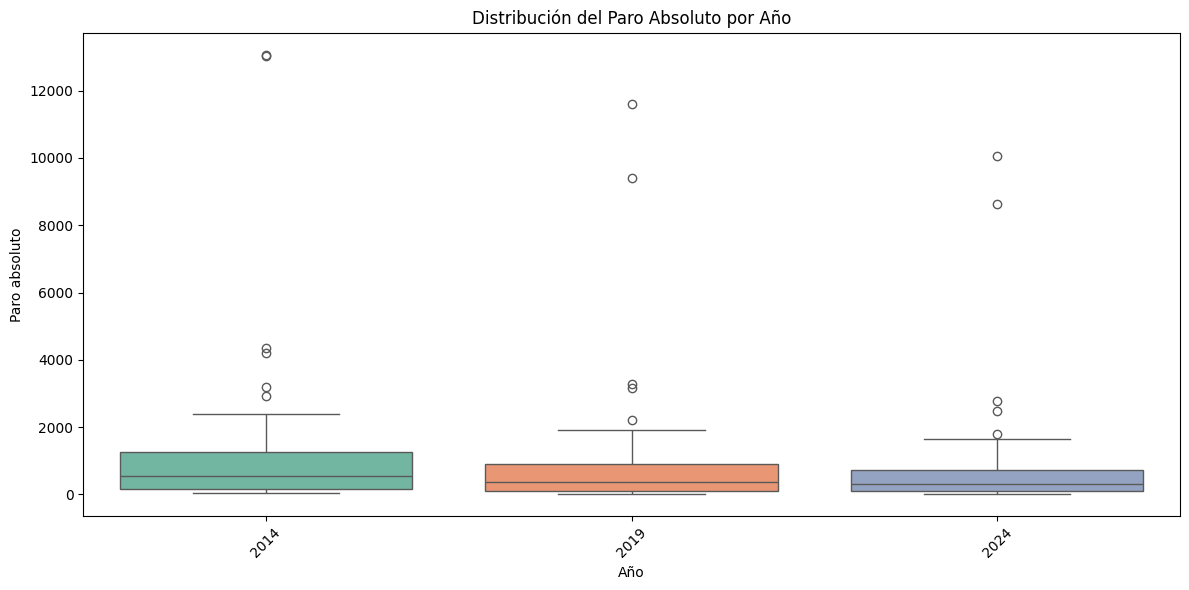

In [5]:
variables = ['Paro absoluto', 'Poblacion', 'Paro normalizado']

plt.figure(figsize=(12, 6))
sns.boxplot(data=paro_df, x='Año', y='Paro absoluto', palette='Set2')

plt.title('Distribución del Paro Absoluto por Año')
plt.xlabel('Año')
plt.ylabel('Paro absoluto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Jon\AppData\Local\Temp\ipykernel_10392\1683820546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=paro_df, x='Año', y='Paro absoluto', palette='Set2', inner='quartile')


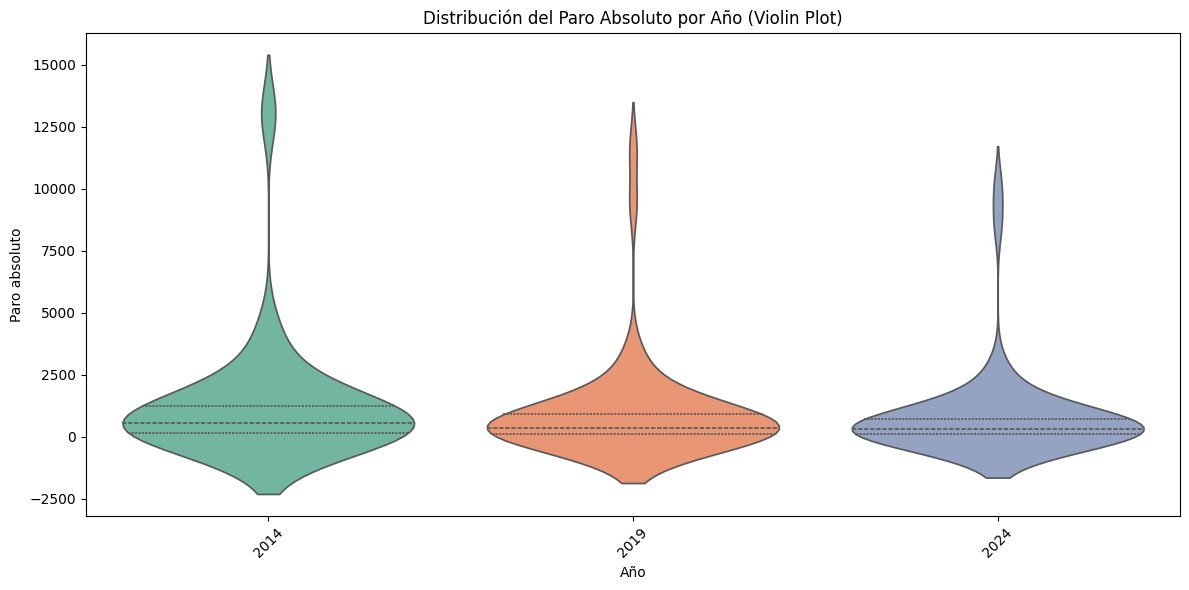

In [6]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=paro_df, x='Año', y='Paro absoluto', palette='Set2', inner='quartile')
plt.title('Distribución del Paro Absoluto por Año (Violin Plot)')
plt.xlabel('Año')
plt.ylabel('Paro absoluto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Jon\AppData\Local\Temp\ipykernel_10392\3449504796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=paro_df, x='Año', y='Poblacion', palette='Set3')


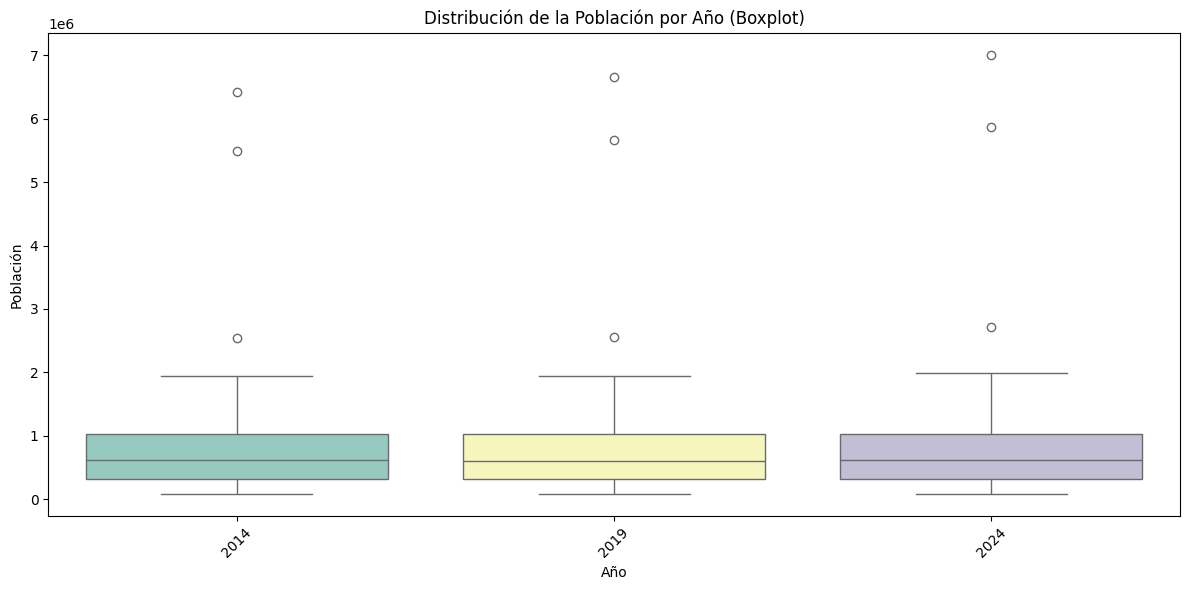

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=paro_df, x='Año', y='Poblacion', palette='Set3')

plt.title('Distribución de la Población por Año (Boxplot)')
plt.xlabel('Año')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

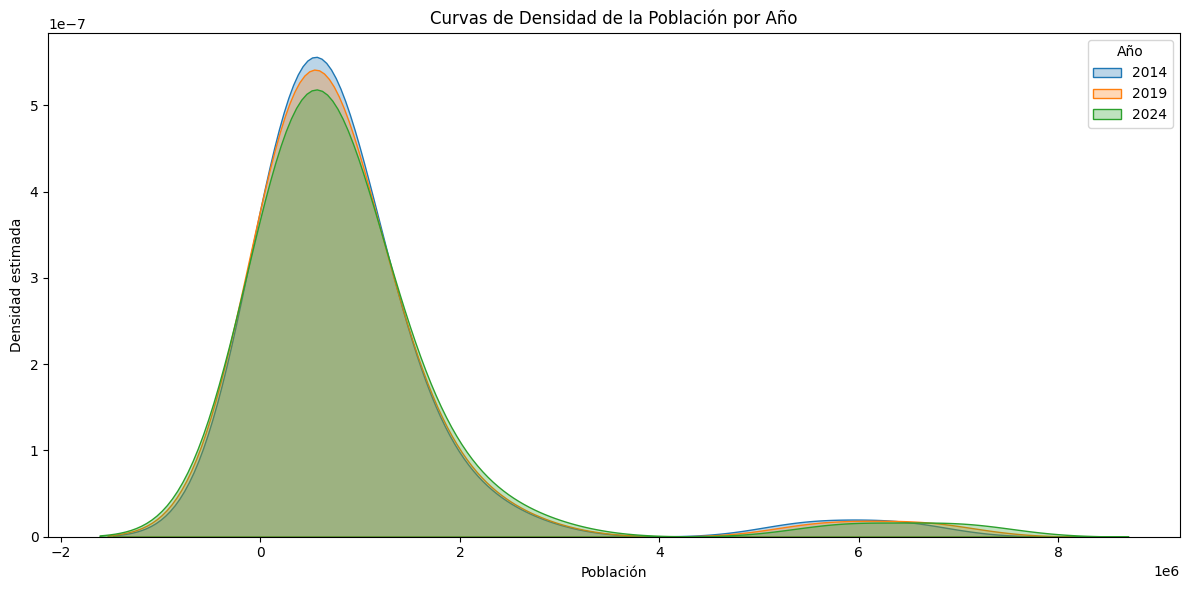

In [8]:
plt.figure(figsize=(12, 6))

for year in sorted(paro_df['Año'].unique()):
    subset = paro_df[paro_df['Año'] == year]
    sns.kdeplot(subset['Poblacion'], label=str(year), fill=True, alpha=0.3)

plt.title('Curvas de Densidad de la Población por Año')
plt.xlabel('Población')
plt.ylabel('Densidad estimada')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

In [9]:
query_renta= """SELECT 
    Provincia,
    `Número de declaraciones`,
    `Renta bruta media`,
    `Rentas  del trabajo`,
    `Rentas exentas`,
    `Renta bruta`,
    `Cotizaciones sociales a la SS`,
    `Cuota resultante de la autoliquidación`,
    `Renta disponible`,
    Año
FROM 
    RENTA
ORDER BY
    Año, Provincia;
"""
renta_df = pd.read_sql(query_renta, con=engine)

In [10]:
print("Valores faltantes:")
print(renta_df.isnull().sum())

Valores faltantes:
Provincia                                 0
Número de declaraciones                   0
Renta bruta media                         0
Rentas  del trabajo                       0
Rentas exentas                            0
Renta bruta                               0
Cotizaciones sociales a la SS             0
Cuota resultante de la autoliquidación    0
Renta disponible                          0
Año                                       0
dtype: int64


In [11]:
pd.set_option('display.float_format', '{:,.0f}'.format)
desc_renta_df = renta_df.describe()
desc_renta_df

,Número de declaraciones,Renta bruta media,Rentas del trabajo,Rentas exentas,Renta bruta,Cotizaciones sociales a la SS,Cuota resultante de la autoliquidación,Renta disponible,Año
count,94,94,94,94,94,94,94,94,94
mean,"427,993","23,830","9,053,610","409,484","11,374,719","439,784","1,645,440","9,290,189","2,016"
std,"592,531","3,605","15,681,183","716,743","20,093,852","731,530","3,456,844","15,918,313",3
min,"27,418","17,693","638,331","18,298","787,228","28,439","58,050","696,663","2,014"
25%,"162,146","21,402","2,839,854","123,074","3,483,112","130,943","411,394","2,945,961","2,014"
50%,"284,520","23,304","4,950,392","209,574","6,109,250","243,688","714,553","5,193,604","2,016"
75%,"472,068","25,282","9,075,326","399,379","11,693,534","454,492","1,485,498","9,580,025","2,019"
max,"3,449,219","37,768","99,869,759","4,339,166","130,269,129","4,494,828","22,709,320","103,069,005","2,019"


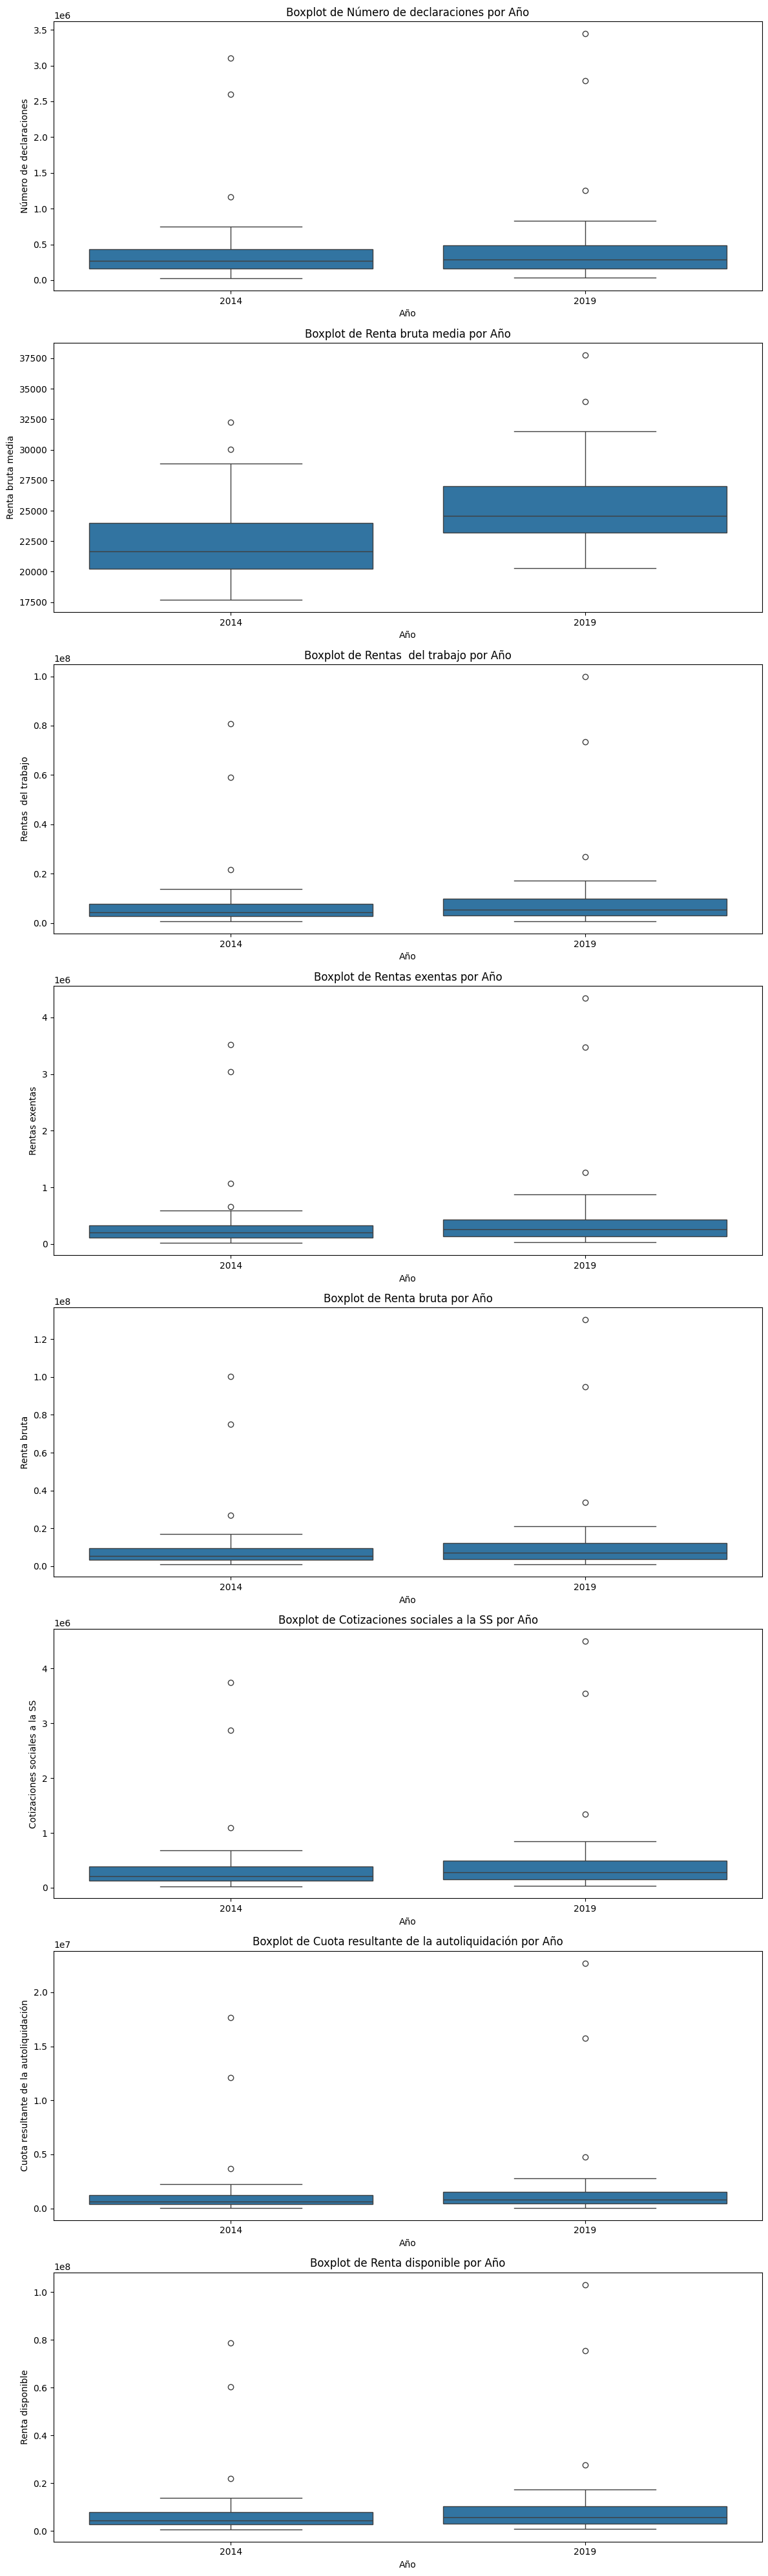

In [12]:
variables = [
    'Número de declaraciones',
    'Renta bruta media',
    'Rentas  del trabajo',
    'Rentas exentas',
    'Renta bruta',
    'Cotizaciones sociales a la SS',
    'Cuota resultante de la autoliquidación',
    'Renta disponible'
]
years = renta_df['Año'].unique()


fig, axes = plt.subplots(len(variables), 1, figsize=(12, 5 * len(variables)))

for i, var in enumerate(variables):
    ax = axes[i]
    sns.boxplot(x='Año', y=var, data=renta_df, ax=ax)
    ax.set_title(f'Boxplot de {var} por Año')

plt.tight_layout()
plt.show()

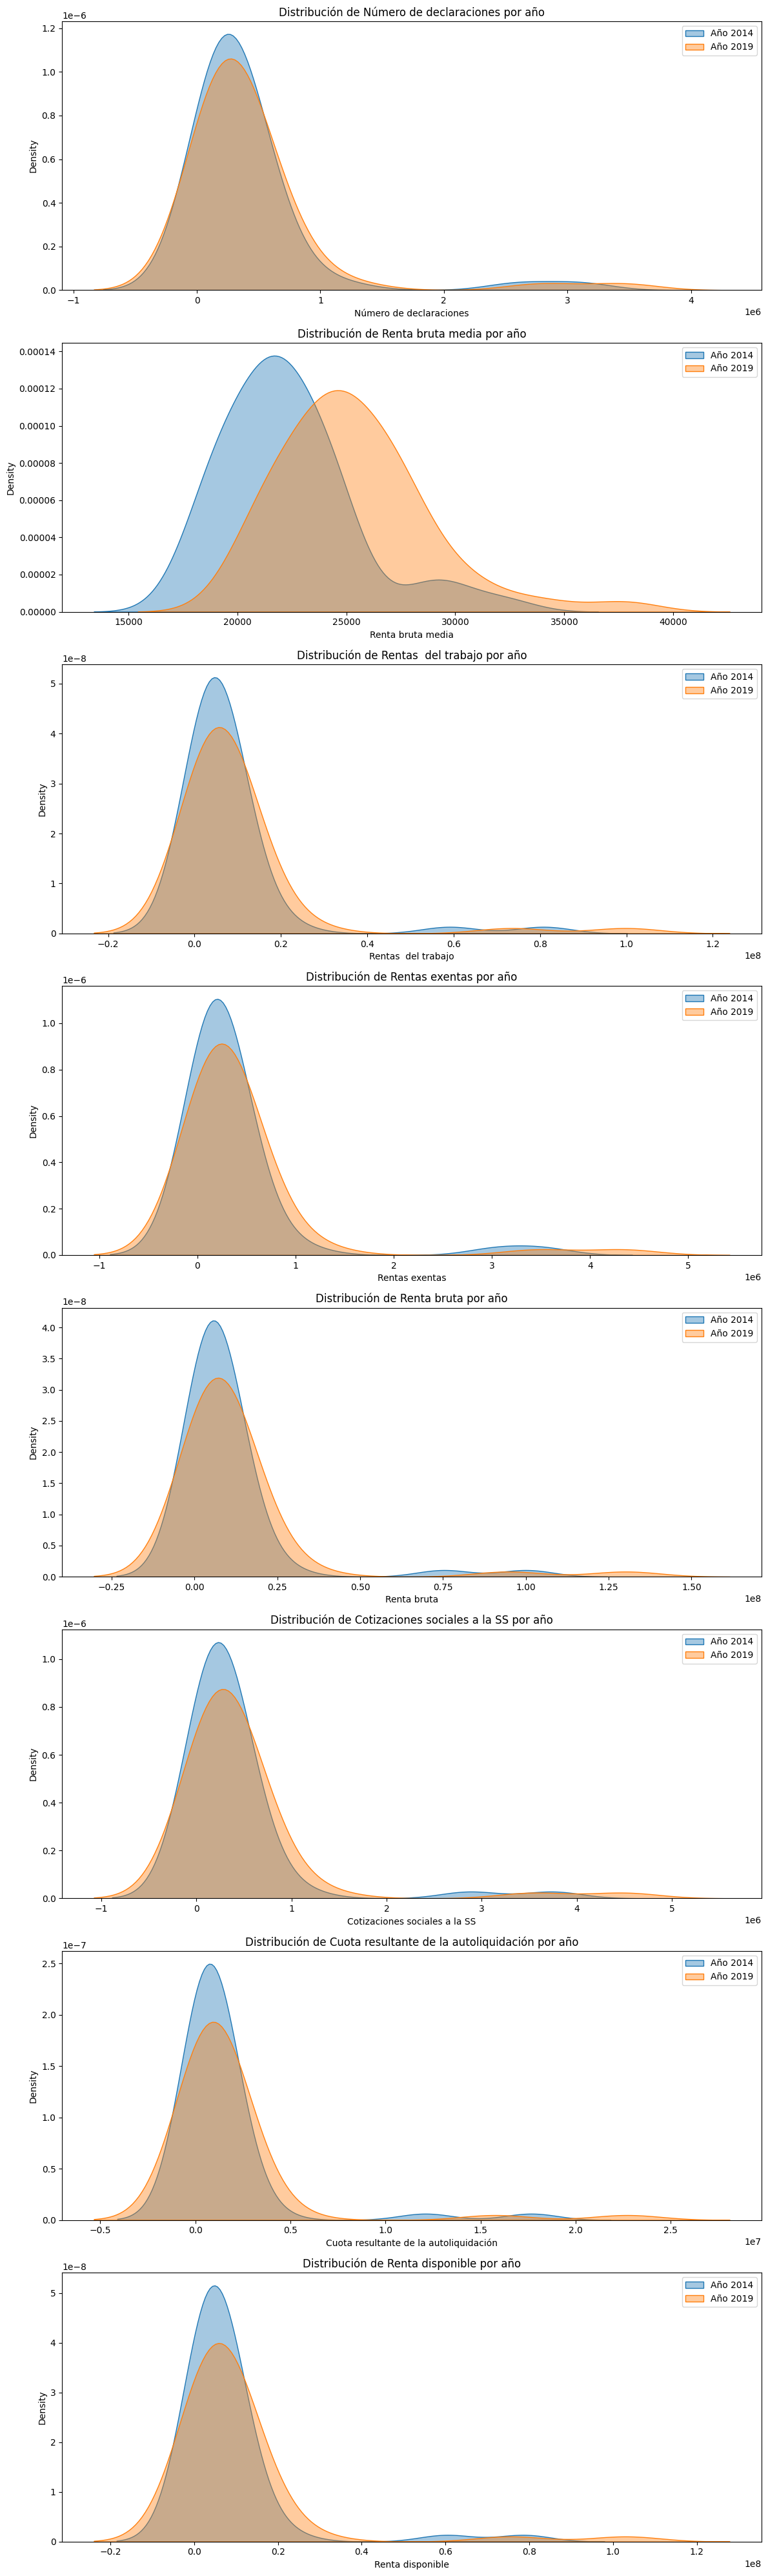

In [13]:
fig, axes = plt.subplots(len(variables), 1, figsize=(12, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    ax = axes[i]
    for year in years:
        sns.kdeplot(
            renta_df[renta_df['Año'] == year][var].dropna(),
            label=f'Año {year}',
            ax=ax,
            fill=True,
            alpha=0.4
        )
    ax.set_title(f'Distribución de {var} por año')
    ax.legend()

plt.tight_layout()
plt.show()

In [14]:
query_show_columns = "SHOW COLUMNS FROM VOTOS_PROVINCIA;"
columns_df = pd.read_sql(query_show_columns, con=engine)
print(columns_df)

                   Field    Type Null Key Default Extra
0             Unnamed: 0  bigint  YES        None      
1           id_provincia  bigint  YES        None      
2                    año  bigint  YES        None      
3  Total censo electoral  bigint  YES        None      
4         Total votantes  bigint  YES        None      
5        Votos en blanco  bigint  YES        None      
6            Votos nulos  bigint  YES        None      


In [15]:
query_votes = """
SELECT
    id_provincia,
    año,
    `Total censo electoral`,
    `Total votantes`,
    `Votos en blanco`,
    `Votos nulos`
FROM
    VOTOS_PROVINCIA
ORDER BY
    año, id_provincia;
"""

votes_df = pd.read_sql(query_votes, con=engine)
votes_df.head()


,id_provincia,año,Total censo electoral,Total votantes,Votos en blanco,Votos nulos
0,1,2014,248665,108262,1717,2007
1,2,2014,305232,145785,3587,3290
2,3,2014,1266522,578847,11375,16476
3,4,2014,459067,185533,4879,3053
4,5,2014,134070,67451,1822,2107


In [16]:
print("Valores faltantes:")
print(votes_df.isnull().sum())

Valores faltantes:
id_provincia             0
año                      0
Total censo electoral    0
Total votantes           0
Votos en blanco          0
Votos nulos              0
dtype: int64


In [17]:
pd.set_option('display.float_format', '{:,.0f}'.format)
desc_votes_df = votes_df.describe()
desc_votes_df

,id_provincia,año,Total censo electoral,Total votantes,Votos en blanco,Votos nulos
count,156,156,156,156,156,156
mean,26,"2,019","677,217","359,509","4,473","3,894"
std,15,4,"846,216","475,001","5,266","4,133"
min,1,"2,014","52,905","14,199",92,73
25%,14,"2,014","254,188","130,388","1,679","1,530"
50%,26,"2,019","470,124","239,442","3,035","2,878"
75%,39,"2,024","782,866","385,686","5,404","5,076"
max,52,"2,024","4,964,662","3,230,174","43,244","33,993"


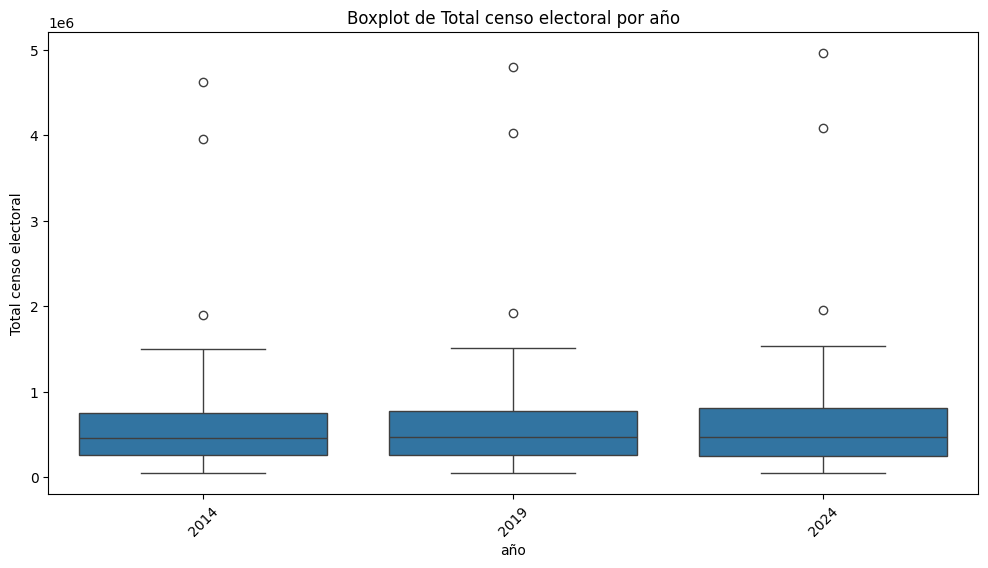

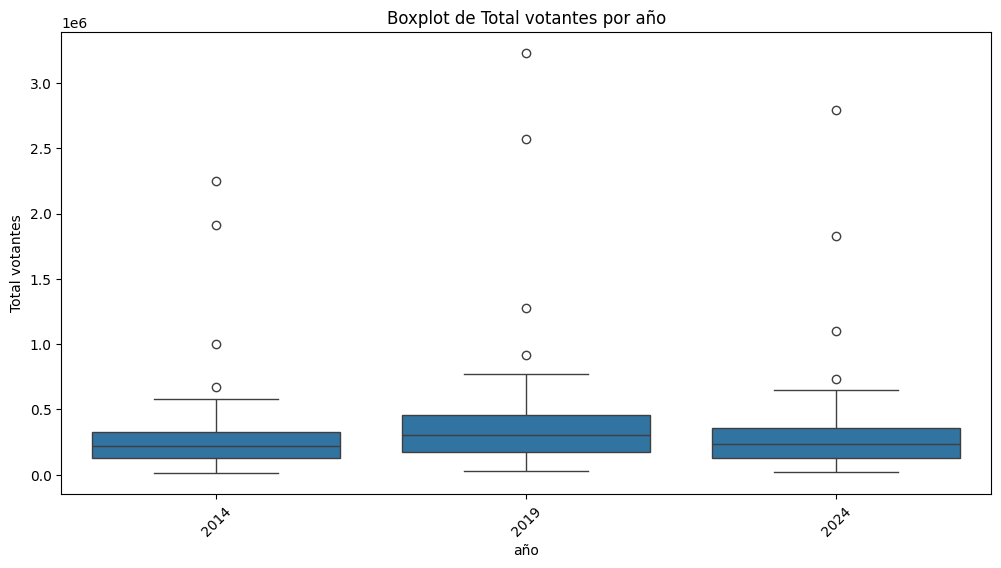

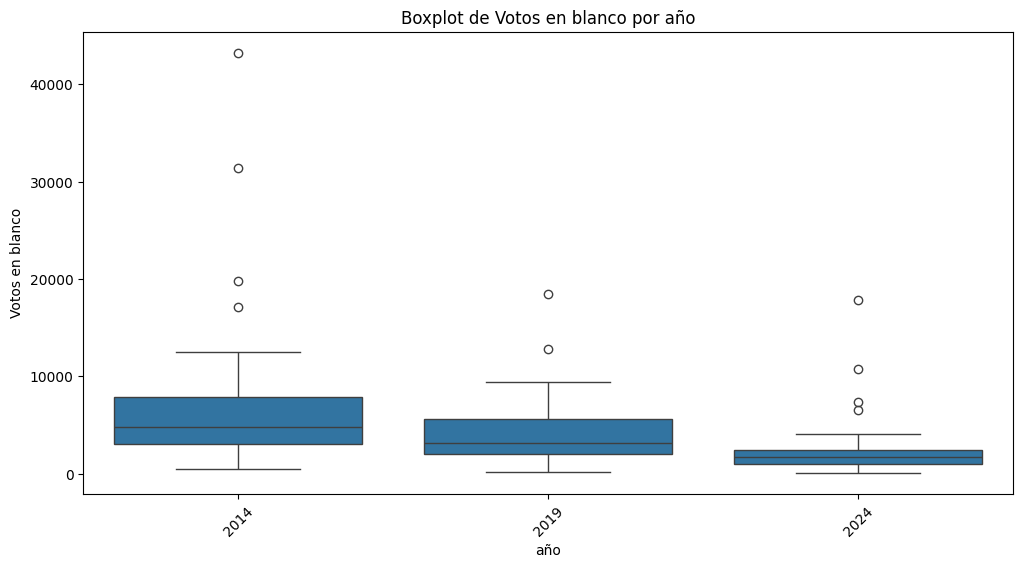

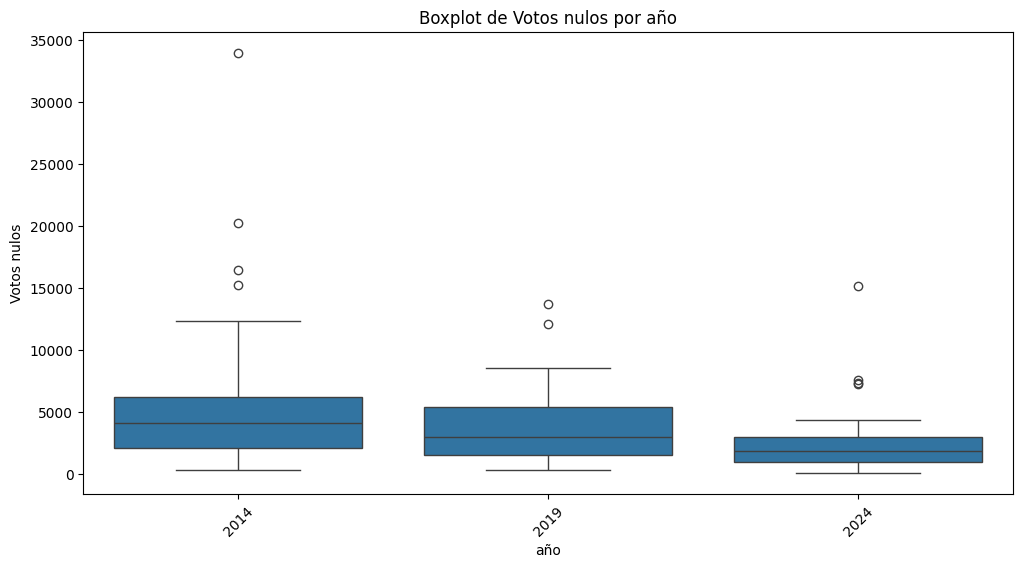

<Figure size 640x480 with 0 Axes>

In [18]:
variables = [
    'Total censo electoral',
    'Total votantes',
    'Votos en blanco',
    'Votos nulos'
]

for var in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=votes_df, x='año', y=var)
    plt.title(f'Boxplot de {var} por año')
    plt.xticks(rotation=45)
    plt.show()
plt.tight_layout()
plt.show()

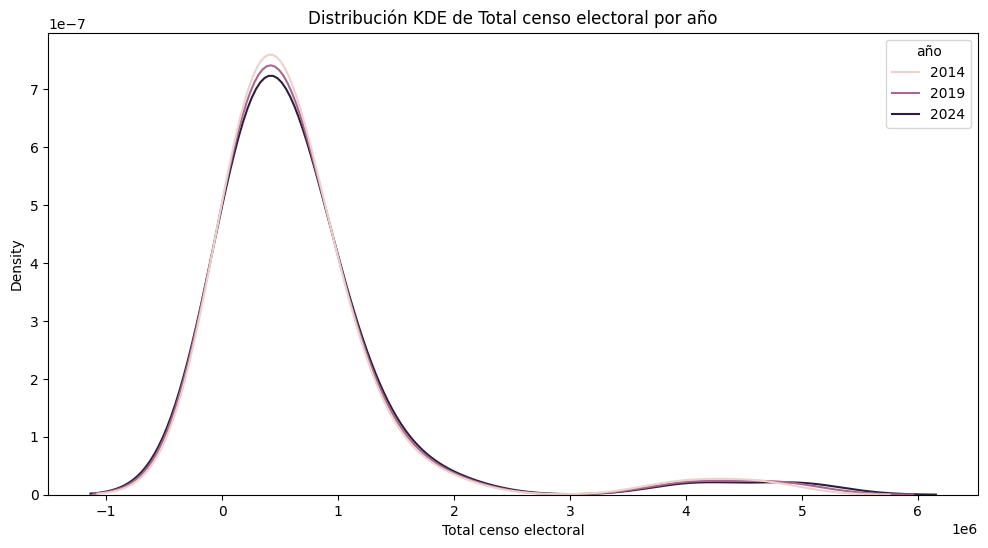

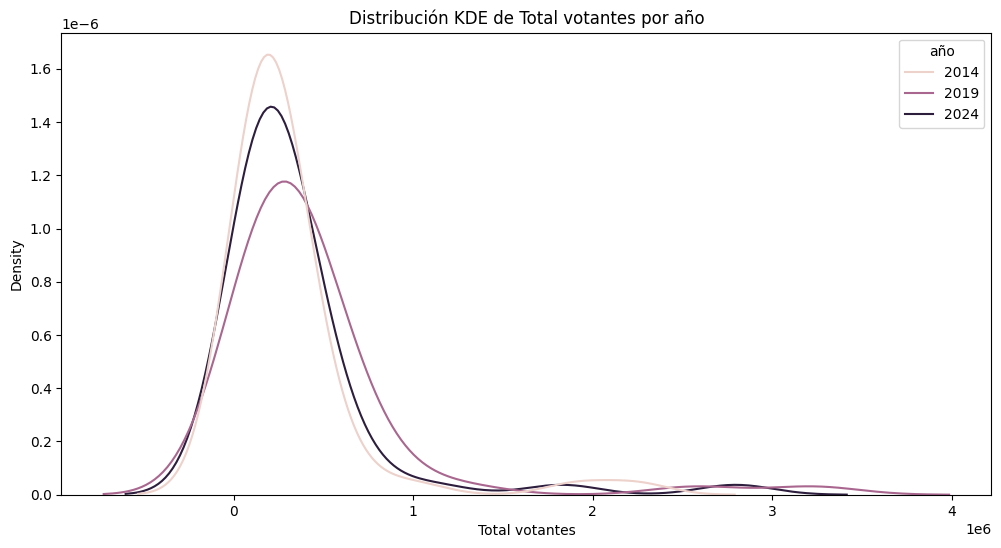

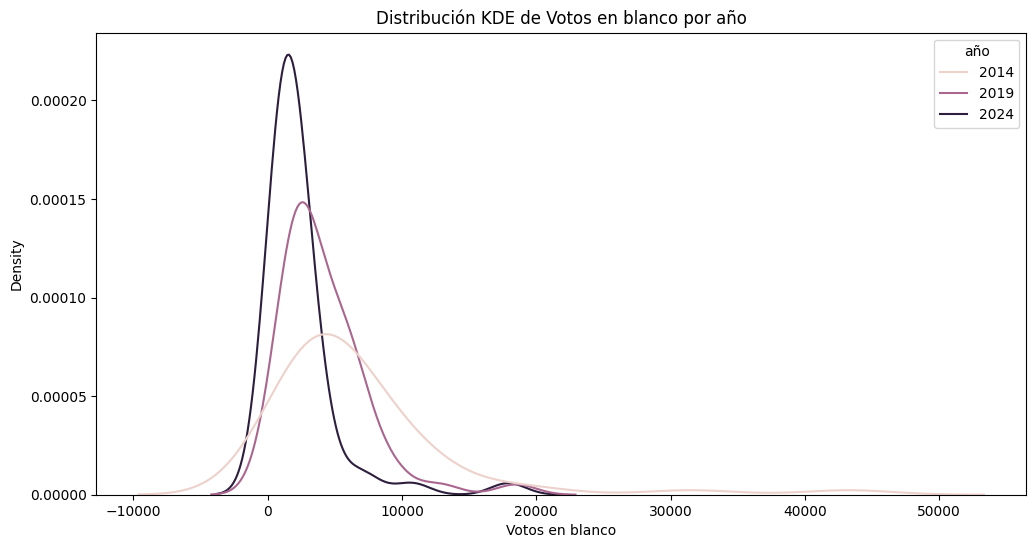

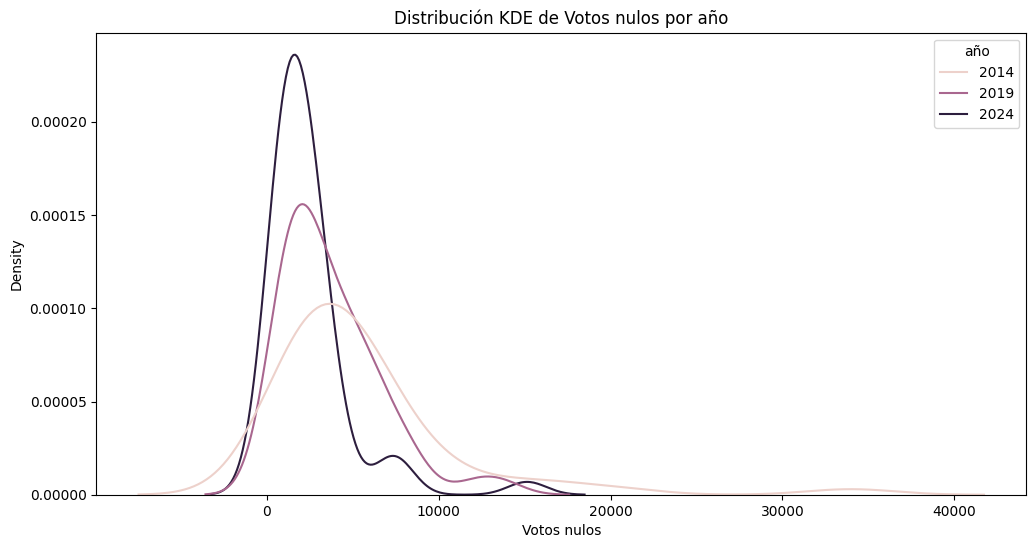

In [19]:
for var in variables:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=votes_df, x=var, hue='año', common_norm=False)
    plt.title(f'Distribución KDE de {var} por año')
    plt.show()

In [20]:
query_show_votos = "SHOW COLUMNS FROM DATOS_PARTIDOS;"
columns_df = pd.read_sql(query_show_votos, con=engine)
print(columns_df)

          Field    Type Null Key Default Extra
0  id_provincia  bigint  YES        None      
1   id_partidos  bigint  YES        None      
2           año  bigint  YES        None      
3         Votos  bigint  YES        None      


In [21]:
query_votos_p = """
SELECT año, Votos FROM DATOS_PARTIDOS;
"""
df_votos_p = pd.read_sql(query_votos_p, con=engine)
df_votos_p.head()

,año,Votos
0,2024,4953
1,2024,17717
2,2024,75219
3,2024,32885
4,2024,8282


In [22]:
print("Valores faltantes:")
print(df_votos_p.isnull().sum())

Valores faltantes:
año      0
Votos    0
dtype: int64


In [23]:
pd.set_option('display.float_format', '{:,.0f}'.format)
desc_votos_p = df_votos_p.describe()
desc_votos_p

,año,Votos
count,"5,356","5,356"
mean,"2,019","8,130"
std,4,"37,612"
min,"2,014",0
25%,"2,014",78
50%,"2,019",234
75%,"2,024","1,212"
max,"2,024","1,039,992"


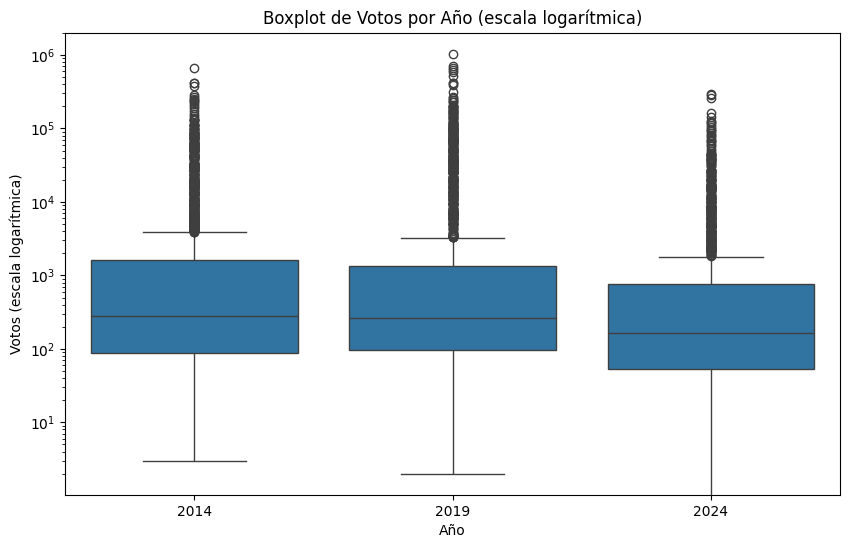

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='año', y='Votos', data=df_votos_p, showfliers=True)

# Poner escala logarítmica en y para enfocar los datos sin perder los outliers
plt.yscale('log')

plt.title('Boxplot de Votos por Año (escala logarítmica)')
plt.xlabel('Año')
plt.ylabel('Votos (escala logarítmica)')
plt.show()

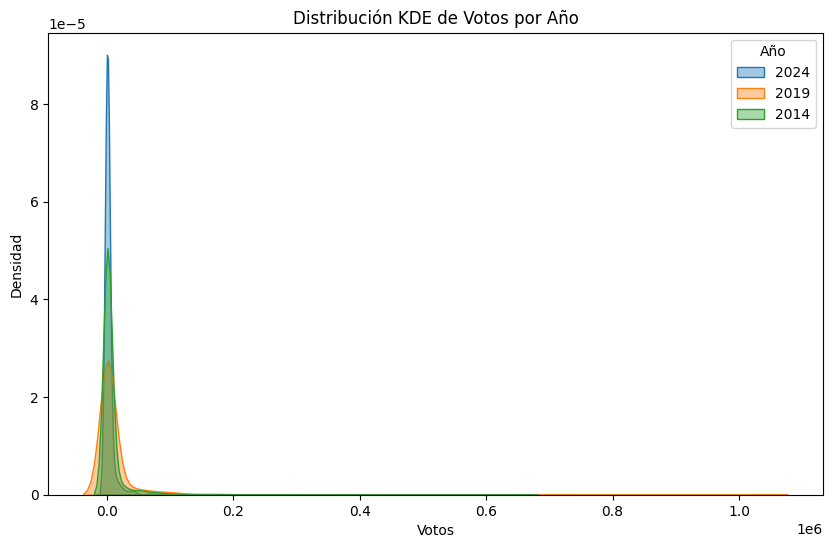

In [25]:
plt.figure(figsize=(10,6))
for year in df_votos_p['año'].unique():
    subset = df_votos_p[df_votos_p['año'] == year]
    sns.kdeplot(subset['Votos'], label=str(year), fill=True, alpha=0.4)

plt.title('Distribución KDE de Votos por Año')
plt.xlabel('Votos')
plt.ylabel('Densidad')
plt.legend(title='Año')
plt.show()

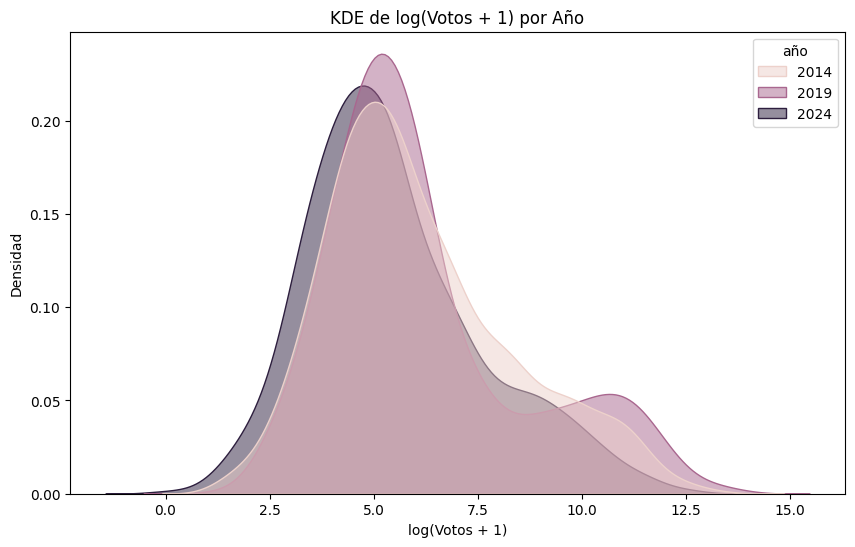

In [26]:

plt.figure(figsize=(10,6))
df_votos_p['log_Votos'] = np.log1p(df_votos_p['Votos'])
sns.kdeplot(data=df_votos_p, x='log_Votos', hue='año', fill=True, common_norm=False, alpha=0.5)

plt.title('KDE de log(Votos + 1) por Año')
plt.xlabel('log(Votos + 1)')
plt.ylabel('Densidad')
plt.show()


In [27]:
query_show_votos = "SHOW COLUMNS FROM PARTIDOS_POLITICOS;"
columns_df = pd.read_sql(query_show_votos, con=engine)
print(columns_df)

         Field    Type Null Key Default Extra
0  id_partidos  bigint  YES        None      
1        Votos    text  YES        None      
2      Escaños  bigint  YES        None      
3        Grupo    text  YES        None      
4          Año  bigint  YES        None      


In [28]:
query = """
SELECT Provincia, `Renta bruta media`, Año
FROM RENTA
WHERE Año IN (2014, 2019)
"""

df_renta = pd.read_sql(query, con=engine)
df_renta.head()

,Provincia,Renta bruta media,Año
0,Almería,21399,2019
1,Cádiz,24497,2019
2,Córdoba,21879,2019
3,Granada,23515,2019
4,Huelva,20972,2019


C:\Users\Jon\AppData\Local\Temp\ipykernel_10392\2213472604.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2014, x='Provincia', y='Renta bruta media', palette=palette_2014)


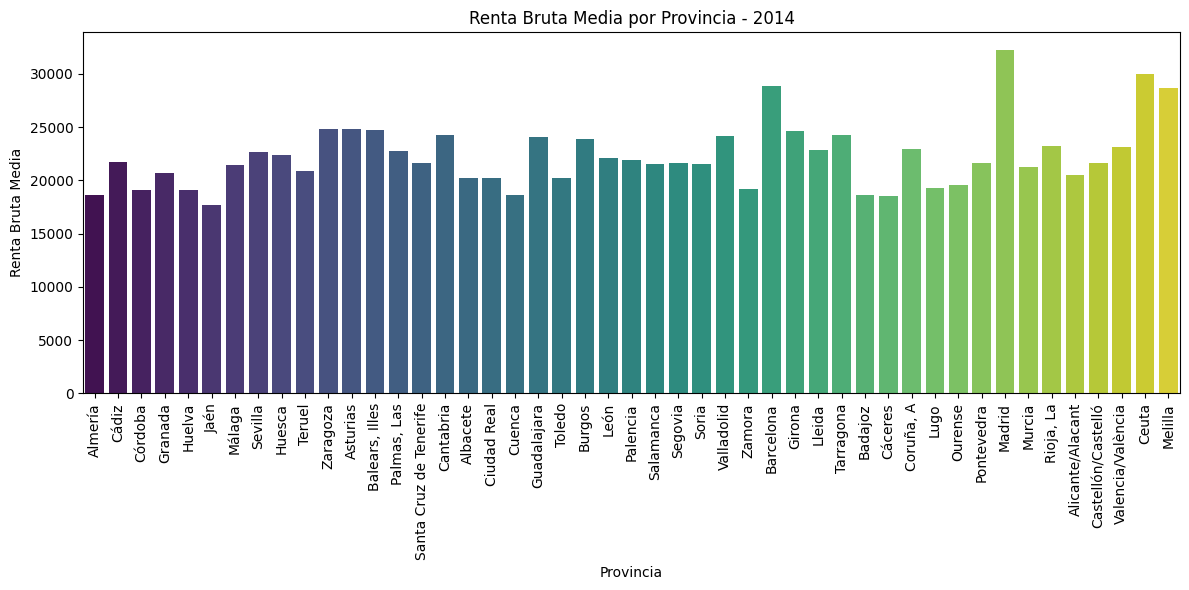

C:\Users\Jon\AppData\Local\Temp\ipykernel_10392\2213472604.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2019, x='Provincia', y='Renta bruta media', palette=palette_2019)


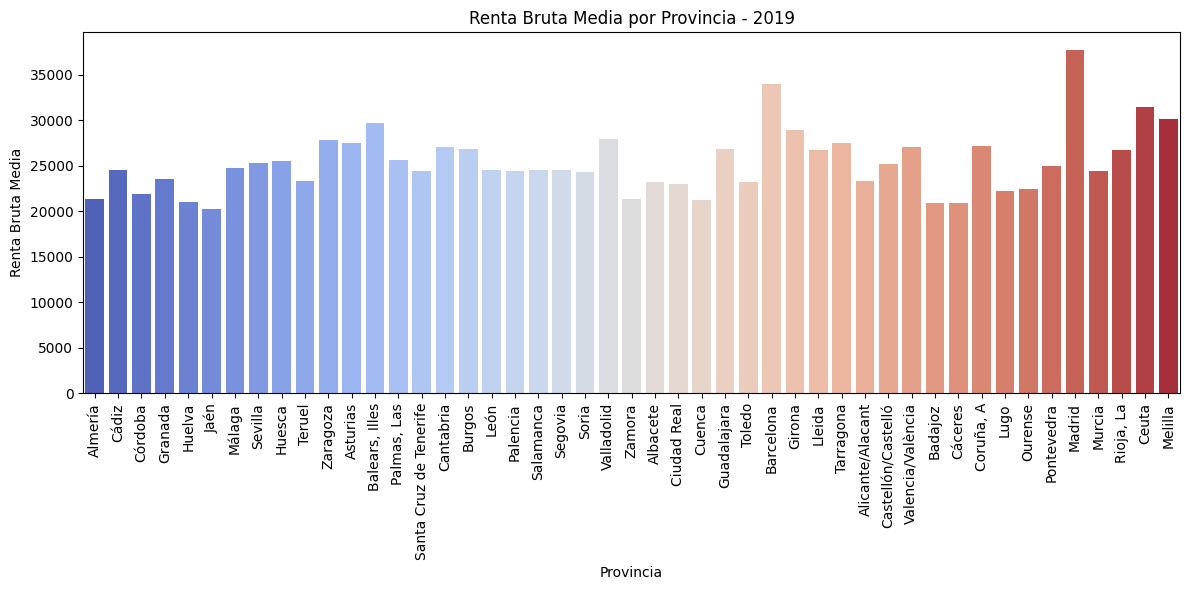

In [29]:
df_2014 = df_renta[df_renta['Año'] == 2014]
df_2019 = df_renta[df_renta['Año'] == 2019]
palette_2014 = sns.color_palette("viridis", len(df_2014))
palette_2019 = sns.color_palette("coolwarm", len(df_2019))


plt.figure(figsize=(12, 6))
sns.barplot(data=df_2014, x='Provincia', y='Renta bruta media', palette=palette_2014)
plt.title('Renta Bruta Media por Provincia - 2014')
plt.xticks(rotation=90)
plt.ylabel('Renta Bruta Media')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_2019, x='Provincia', y='Renta bruta media', palette=palette_2019)
plt.title('Renta Bruta Media por Provincia - 2019')
plt.xticks(rotation=90)
plt.ylabel('Renta Bruta Media')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()
